<a href="https://colab.research.google.com/github/LinkedInLearning/deep-learning-and-generative-ai-with-python-data-preprocessing-and-analytics-3896069/blob/main/06_02_begin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Customer LifeTime Value

## Load and Check the Data

In [ ]:
# Necessary imports
import pandas as pd  # Importing pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing matplotlib for plotting graphs
import seaborn as sns  # Importing seaborn for statistical data visualization
import numpy as np  # Importing numpy for numerical operations

# Importing necessary functions and classes from scikit-learn for model selection and preprocessing
from sklearn.model_selection import train_test_split  # Function to split the data into train and test sets
from sklearn.preprocessing import StandardScaler  # Class to standardize features by removing the mean and scaling to unit variance

# Importing necessary functions and classes from Keras for building neural network models
from keras.models import Sequential  # Sequential model is a linear stack of layers
from keras.layers import Input, Dense  # Input layer to specify the shape of input data, Dense layer is a fully connected layer
from keras.callbacks import EarlyStopping  # Callback to stop training when a monitored metric has stopped improving




In [ ]:
#Load the dataset

cleaned_df = pd.read_csv('/content/eda_telecom.csv')

In [ ]:
cleaned_df.head()

In [ ]:
# Note that CLV and Total Services Used were feature engineered in the previous lab.

cleaned_df.info()

In [ ]:
#Check for missing values

import missingno as msno

msno.bar(cleaned_df)

## Build and Train a Keras Sequential Model

Where all of the hard work of data preprocessing and EDA is realized!

In [ ]:

# Select features and target
X = cleaned_df[['monthly_charge', 'total_charges', 'total_services_used']]
y = cleaned_df['CLV']  # target column (remember tenure*total revenue is CLV)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Assuming X_train is already defined and its shape is known
input_shape = X_train.shape[1]

# Build the model
model = Sequential()
model.add(Input(shape=(input_shape,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')

# Predict CLV
y_pred = model.predict(X_test)

# Print model summary
model.summary()




# Using Data Visualization to Evaluate Model Performance

## Exercise #1. Plot the Training and Validation Loss Curves




### Training and Validation Loss Curves Visualization and Analysis

In [ ]:
# Plotting the loss curves








Convergence of Training and Validation Loss:

The training and validation loss curves indicate that your model is learning effectively and generalizing well to the validation data. The absence of overfitting and the stabilization of loss values suggest that the training process has been successful.

After around 20 epochs, both the training and validation loss curves start to flatten out and converge towards each other. This indicates that the model is approaching its optimal performance, and further training is resulting in only marginal improvements.
No Overfitting:

The training and validation loss curves are very close to each other throughout the training process. This suggests that there is no significant overfitting happening, as the model's performance on the training data is similar to its performance on the validation data.

## Exercise #2. Plot the Residual Distribution

### Predicted vs. Actual Values Visualization and Analysis

In [ ]:
# Calculate residuals
residuals = y_test - y_pred.flatten()

#-------------------------------------------------------------------
# Enter code to Plot residuals










Overall, the model seems to be performing reasonably well, with most residuals clustered around zero. This suggests that the model is generally making accurate predictions.

## Exercise #3. Plot Predicted vs. Actual Values

### Predicted vs. Actual Values Visualizaition and Analysis

In [ ]:
# Plot predicted vs actual values







This scatter plot compares the predicted values against the actual values for your regression model. The plot indicates that your regression model performs well, with many predictions close to the actual values and no significant systematic bias. However, there are some outliers that suggest room for improvement. By investigating these outliers and potentially adjusting the model, you can further enhance the accuracy and robustness of your predictions.

In [ ]:
'''=== predict the CLV =='''

# predict SALES using the test data
test_predictions = model.predict(X_test).flatten()
print(test_predictions)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[101281.945   89833.21    19983.3    ... 232015.23   536954.9
   4688.1963]


Predicted CLV: The array represents the predicted CLV for each customer in the test set.

High Values: Customers with high predicted values (e.g., 536,955) are expected to generate a high lifetime value for the company.
Low Values: Customers with low predicted values (e.g., 4,688) are expected to generate a lower lifetime value.

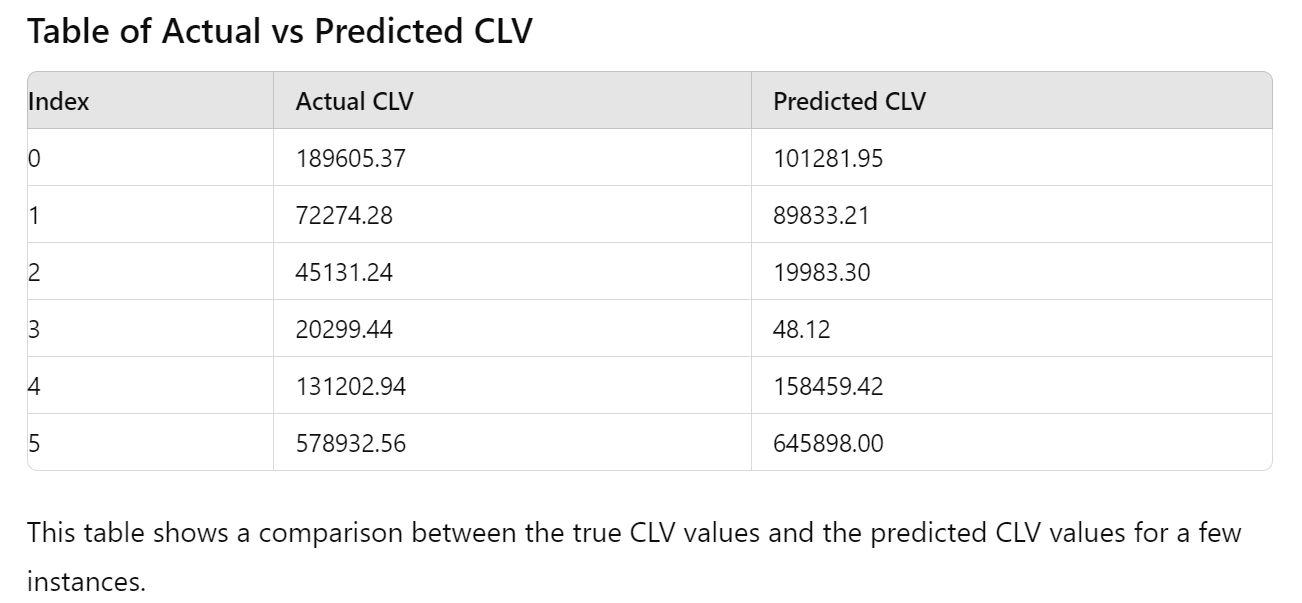

Table: The table format provides a clear and concise comparison between the actual and predicted values for a few instances, highlighting where the model is performing well and where it has significant errors.

Scatter Plot with Regression Line: The scatter plot provides a visual representation of the entire dataset, showing how well the predicted values align with the actual values. The regression line (in blue) indicates the trend and helps in visualizing the overall performance of the model. Points close to the line indicate accurate predictions, while points far from the line indicate larger prediction errors.

# Use Generative AI to Analyze the Visualizations

Use Generative AI's ability to generate new content and answer questions by copying and pasting any image into an AI Chatbot. Ask the AI Chatbot to interpret the image. The AI Chatbot will provide a detailed analysis for you - one that you can use for any analytics report.

Common AI Chatbots include:
Google’s Gemini
OpenAI’s Chat GPT


## Exercise #4 Use an AI Chatbot to Analyze the Visualizations!



1.   Copy the graphs you have just plotted (right-click on image and select "copy image")
2.   Open up a Chat AI that can accept image prompts.
3. Paste the image into the Chat AI and write "Interpret this".



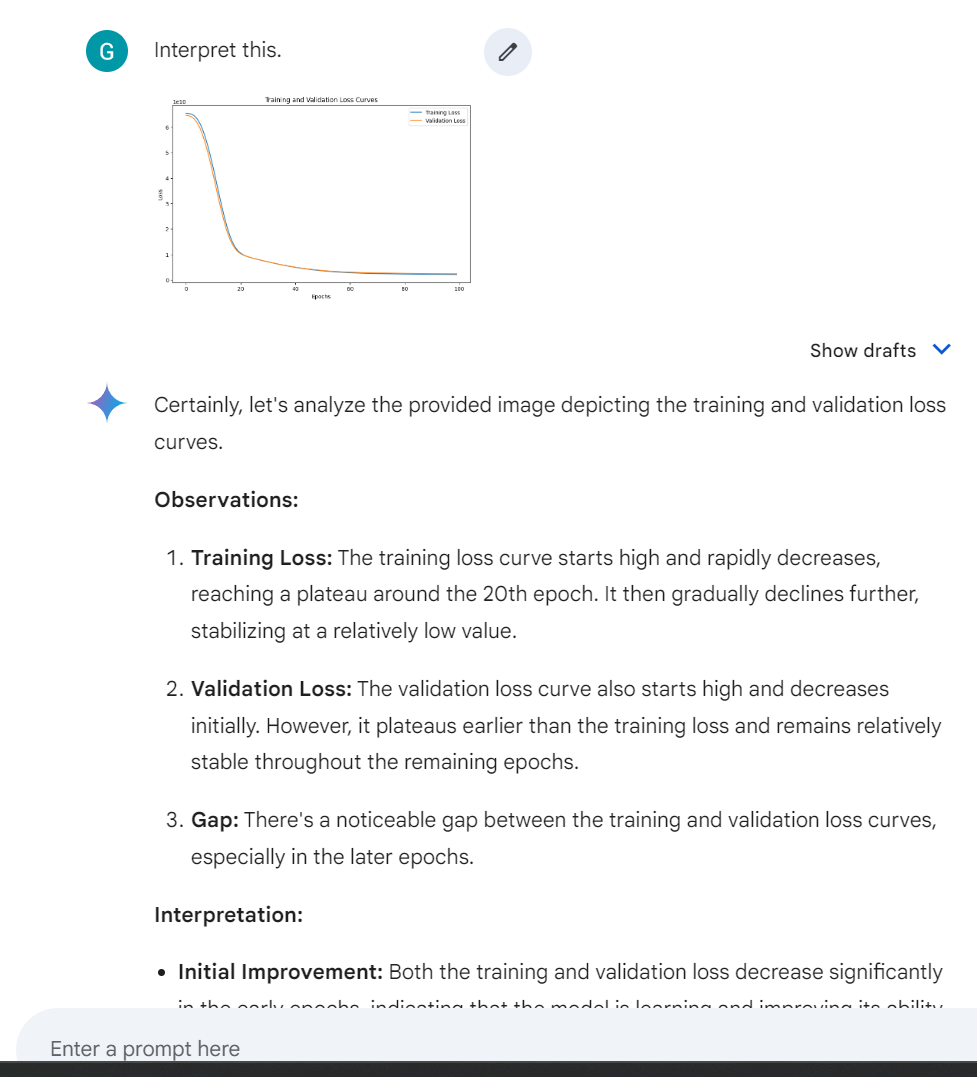